## 1.Import Library & Dataset

### 1.1 Import Library

In [1]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno


#import the necessary modelling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,f1_score


#Encoder
from sklearn.preprocessing import (
    StandardScaler,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder
)

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE


### 1.2 Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
dataset = '/content/drive/MyDrive/DATA/HR_machine_learning/hr_analysis_data.csv'

df = pd.read_csv(dataset)



##2. EDA

### 2.1 Overall

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
my_list = df.columns.values.tolist()

for column in my_list:
  print(column)
  print(df[column].unique())

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition
['Yes' 'No']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496

### 2.2 Distribution of features

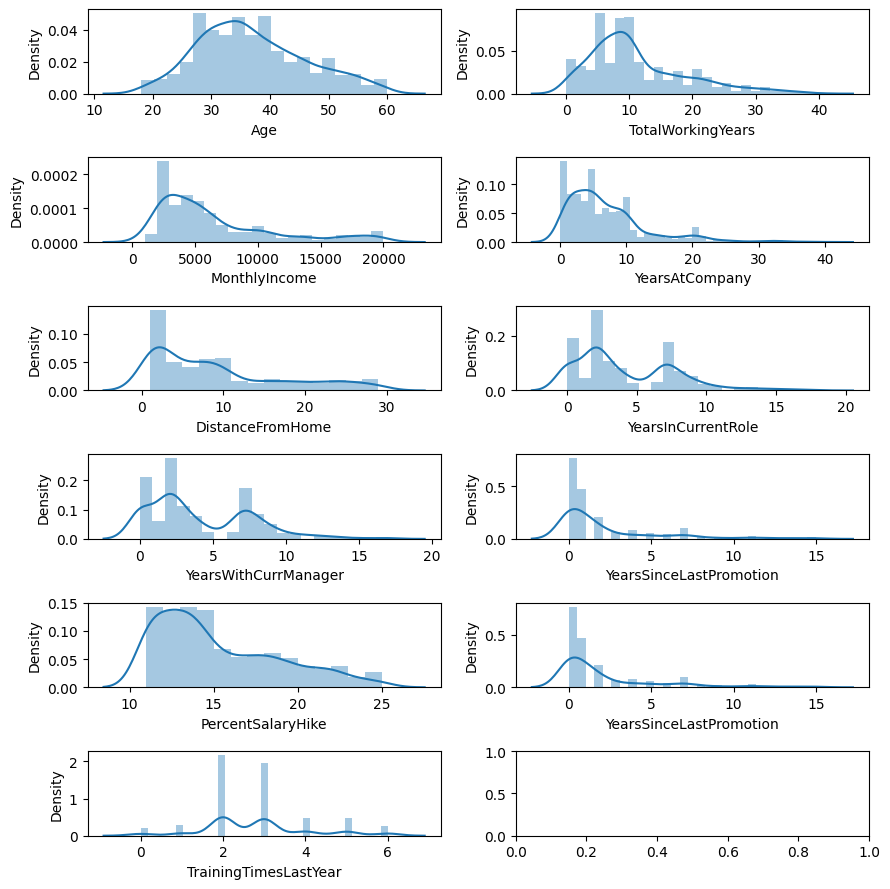

In [8]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
# warnings.filterwarnings('always')
# warnings.filterwarnings('ignore')

fig,ax = plt.subplots(6,2, figsize=(9,9))
sns.distplot(df['Age'], ax = ax[0,0])
sns.distplot(df['TotalWorkingYears'], ax = ax[0,1])
sns.distplot(df['MonthlyIncome'], ax = ax[1,0])
sns.distplot(df['YearsAtCompany'], ax = ax[1,1])
sns.distplot(df['DistanceFromHome'], ax = ax[2,0])
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,1])
sns.distplot(df['YearsWithCurrManager'], ax = ax[3,0])
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,1])
sns.distplot(df['PercentSalaryHike'], ax = ax[4,0])
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,1])
sns.distplot(df['TrainingTimesLastYear'], ax = ax[5,0])
plt.tight_layout()
plt.show()

#### Demographics

In [9]:
#Age Grouping

for index, row in df.iterrows():
    if row['Age'] < 25:
        df.loc[index, 'age_group'] = '18-24'
    elif (row['Age'] >= 25) & (row['Age'] < 35):
        df.loc[index, 'age_group'] = '25-34'
    elif (row['Age'] >= 35) & (row['Age'] < 55):
        df.loc[index, 'age_group'] = '36-54'
    else:
        df.loc[index, 'age_group'] = 'over 55'

#Distance From Home Grouping
for index, row in df.iterrows():
    if row['DistanceFromHome'] <= 5:
        df.loc[index, 'distance_group'] = '0-5'
    elif (row['DistanceFromHome'] > 5) & (row['DistanceFromHome'] <= 10):
        df.loc[index, 'distance_group'] = '6-10'
    elif (row['DistanceFromHome'] > 10) & (row['DistanceFromHome'] <= 15):
        df.loc[index, 'distance_group'] = '11-15'
    else:
        df.loc[index, 'distance_group'] = 'over 15'

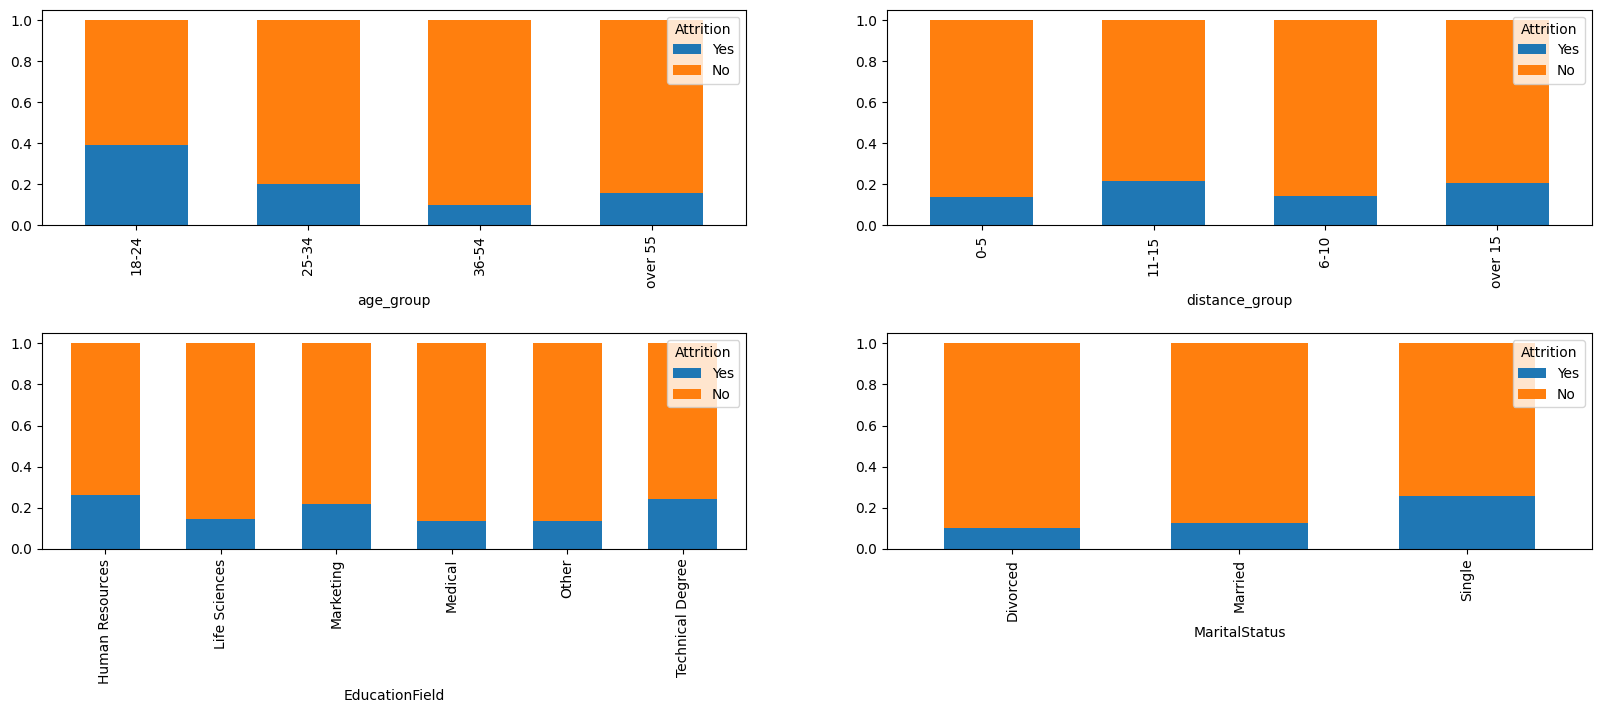

In [10]:
columns_jobs_to_plot = ['age_group', 'distance_group', 'EducationField', 'MaritalStatus']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.2)


for i, column in enumerate(columns_jobs_to_plot):
    row, col = i // 2, i % 2  # Calculate the row and column for the subplot
    ax = axes[row, col]

    # Calculate the average values for the current column by Attrition
    column_status = df.groupby(column)['Attrition'].value_counts(normalize=True).unstack()
    column_status = column_status[['Yes', 'No']]

    # Create a stacked bar plot for the current column
    column_status.plot(kind='bar', stacked=True, ax=ax, width=0.6)

    # Add data labels to the bars


# Show the subplots
plt.gcf().set_size_inches(20, 7)
plt.show()


Younger employees show a higher tendency to leave the company. This could be attributed to their stage in life, as they may be less settled and more open to exploring different career opportunities.

#### Working Experience

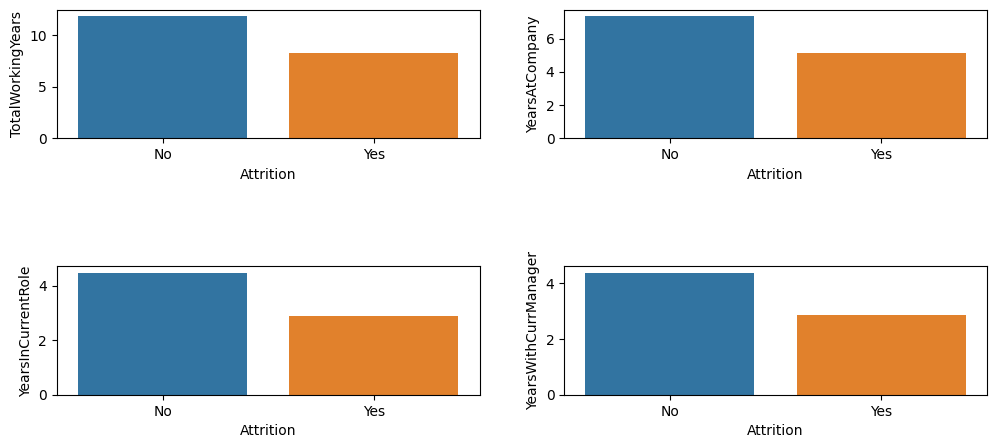

In [11]:
columns_to_plot = ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

# Create a larger grid of subplots to display the plots
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=1)

# Iterate through the columns and create a bar plot for each
for i, column in enumerate(columns_to_plot):
    row, col = i // 2, i % 2  # Calculate the row and column for the subplot
    ax = axes[row, col]

    # Calculate the average values for the current column by Attrition
    avg_values = df.groupby('Attrition')[column].mean().reset_index()

    # Create a bar plot for the current column
    sns.barplot(data=avg_values, x='Attrition', y=column, ci=None, ax=ax)

    # Add data labels to the bars


    ax.set_xlabel('Attrition')
# Show the subplots
plt.gcf().set_size_inches(12, 5)
plt.show()

#### Job satisfaction & Involvement

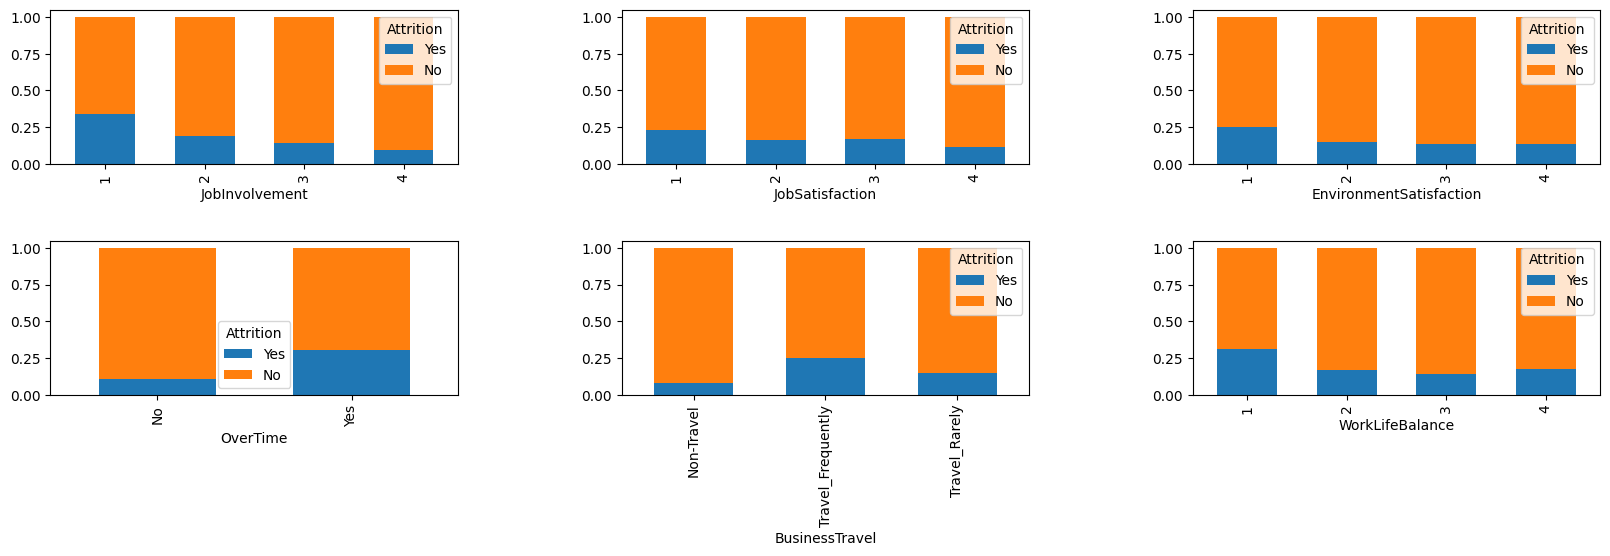

In [12]:
columns_jobs_to_plot = ['JobInvolvement', 'JobSatisfaction', 'EnvironmentSatisfaction', 'OverTime', 'BusinessTravel', 'WorkLifeBalance']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.4)


for i, column in enumerate(columns_jobs_to_plot):
    row, col = i // 3, i % 3  # Calculate the row and column for the subplot
    ax = axes[row, col]

    # Calculate the average values for the current column by Attrition
    column_status = df.groupby(column)['Attrition'].value_counts(normalize=True).unstack()
    column_status = column_status[['Yes', 'No']]

    # Create a stacked bar plot for the current column
    column_status.plot(kind='bar', stacked=True, ax=ax, width=0.6)

    # Add data labels to the bars


# Show the subplots
plt.gcf().set_size_inches(20, 5)
plt.show()


#### Department

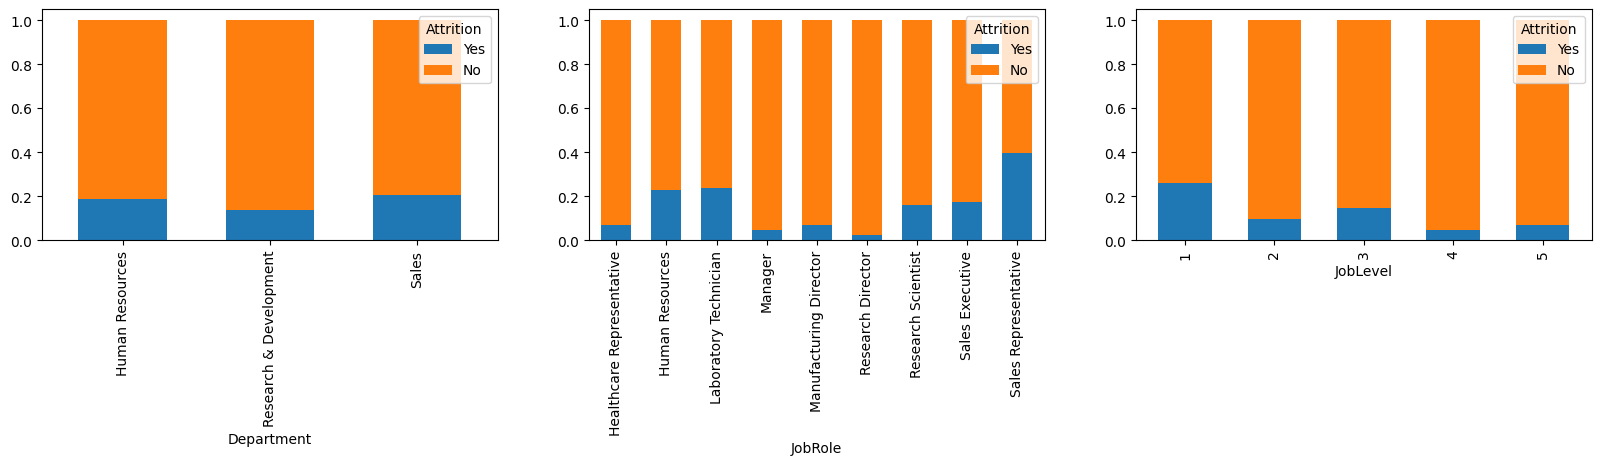

In [13]:
columns_deparment_to_plot = ['Department', 'JobRole','JobLevel']

fig, axes = plt.subplots(nrows=1, ncols=3)
fig.subplots_adjust(hspace=0.5, wspace=0.2)


for i, column in enumerate(columns_deparment_to_plot):
    ax = axes[i]

    # Calculate the average values for the current column by Attrition
    column_status = df.groupby(column)['Attrition'].value_counts(normalize=True).unstack()
    column_status = column_status[['Yes', 'No']]

    # Create a stacked bar plot for the current column
    column_status.plot(kind='bar', stacked=True, ax=ax, width=0.6)


# Show the subplots
plt.gcf().set_size_inches(20, 3)
plt.show()


#### C&B

In [14]:
for index, row in df.iterrows():
    if row['MonthlyIncome'] < 5001:
        df.loc[index, 'income_group'] = '0-5k'
    elif (row['MonthlyIncome'] > 5001) & (row['MonthlyIncome'] < 16001):
        df.loc[index, 'income_group'] = '6-15k'
    else:
        df.loc[index, 'income_group'] = 'over 15k'

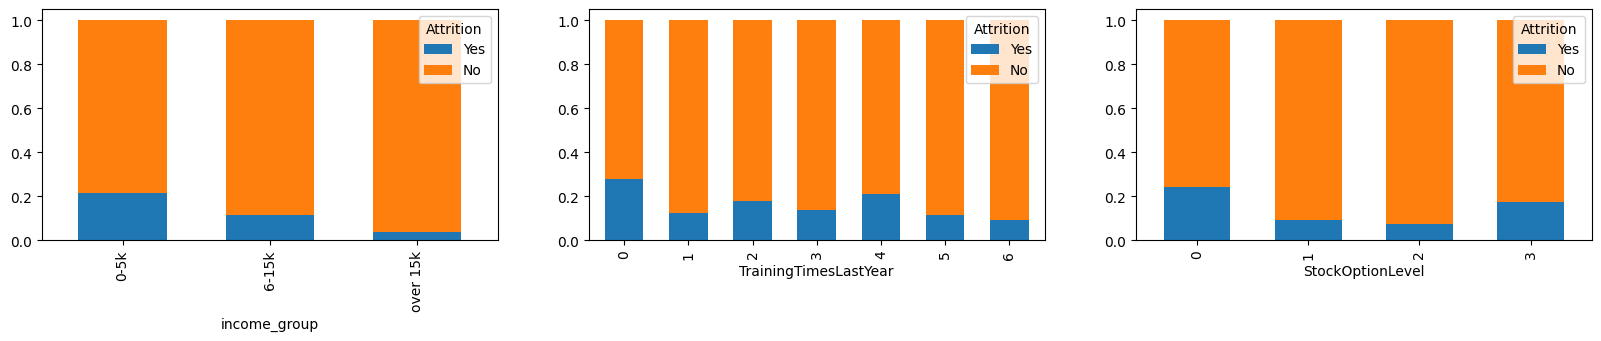

In [15]:
columns_other_to_plot = ['income_group', 'TrainingTimesLastYear','StockOptionLevel']

fig, axes = plt.subplots(nrows=1, ncols=3)
fig.subplots_adjust(hspace=0.5, wspace=0.2)


for i, column in enumerate(columns_other_to_plot):
    ax = axes[i]

    # Calculate the average values for the current column by Attrition
    column_status = df.groupby(column)['Attrition'].value_counts(normalize=True).unstack()
    column_status = column_status[['Yes', 'No']]

    # Create a stacked bar plot for the current column
    column_status.plot(kind='bar', stacked=True, ax=ax, width=0.6)


# Show the subplots
plt.gcf().set_size_inches(20, 3)
plt.show()


### 2.3 Corelation Target & Features

---




In [16]:
for index, row in df.iterrows():
    if row['Attrition'] == 'Yes':
        df.loc[index, 'Attrition_group'] = 1
    else:
        df.loc[index, 'Attrition_group'] = 0

df['Attrition_group'] = df['Attrition_group'].astype('int')

In [17]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_group,distance_group,income_group,Attrition_group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,36-54,0-5,6-15k,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,36-54,6-10,6-15k,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,36-54,0-5,0-5k,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,25-34,0-5,0-5k,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,25-34,0-5,0-5k,0


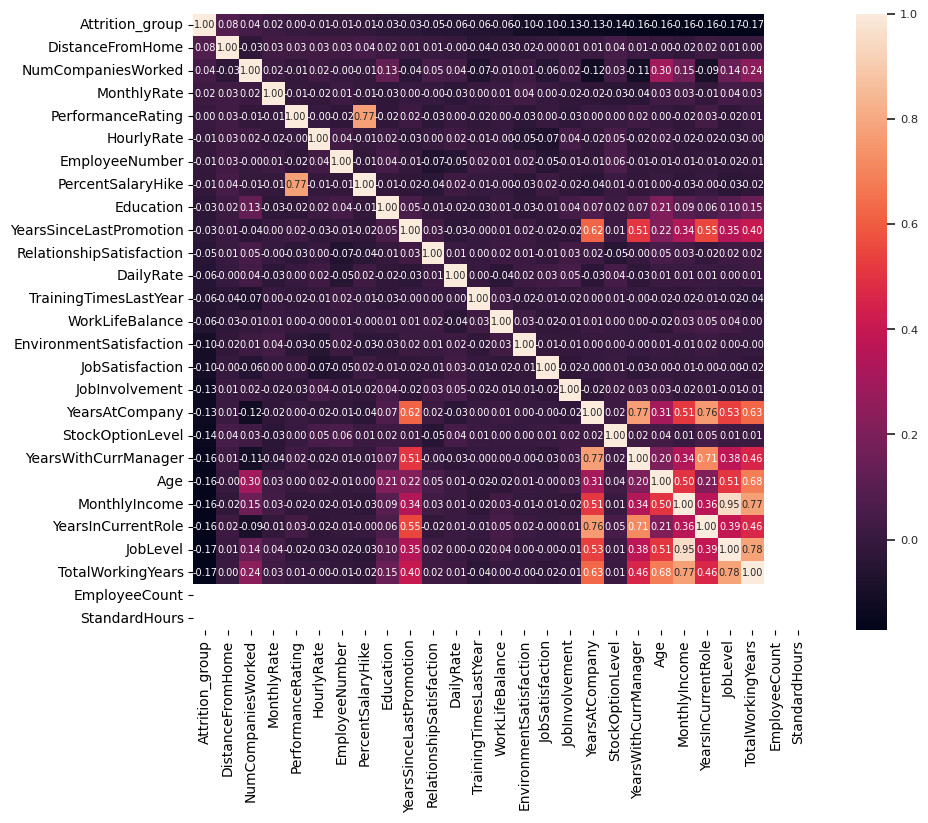

In [18]:
#treatment correlation matrix
f, ax = plt.subplots(figsize=(12, 8))
corrmat = df.corr()
k = 27 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Attrition_group')['Attrition_group'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=0.75)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

After performing Exploratory Data Analysis (EDA) and generating a correlation matrix, we can easily identify significant patterns within the dataset. It becomes evident that there exists a strong correlation between an employee's tenure at the company and their salary. In other words, the longer an employee remains committed to the company, the more likely they are to enjoy higher compensation. This trend is also observed with job level, as those in higher positions tend to receive greater rewards.

Furthermore, we notice that high-performing employees often experience more substantial salary increases, suggesting a reward for their excellent performance. On the flip side, employees with fewer years of service or younger individuals show a higher likelihood of leaving the company, indicating a correlation between attrition and these factors.

Additionally, the department in which an employee works plays a crucial role in attrition rates. For instance, employees in sales positions face greater pressure to drive profits for the company, which may explain their higher attrition rates.

Regarding demographic factors, aside from age, it's noteworthy that single employees tend to be more decisive in opting for attrition. These findings provide valuable insights into the relationships between various aspects of employee tenure, performance, and demographics in the context of attrition.

## 3. PREDICTIVE METHODS

### 3.1 Selection Features for training model

Base on the previous conclusion of EDA part , we can assume that we could select these features that impact direectly to the attrition of Employees.

'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender','JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
'RelationshipSatisfaction', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'TravelRarely', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'

In [19]:
# We will drop out some features

df.drop(['DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
          ,'NumCompaniesWorked','Over18','StandardHours','age_group', 'distance_group', 'income_group',
        'Attrition_group' ],axis=1,inplace= True)

### 3.2 Dataset for training model

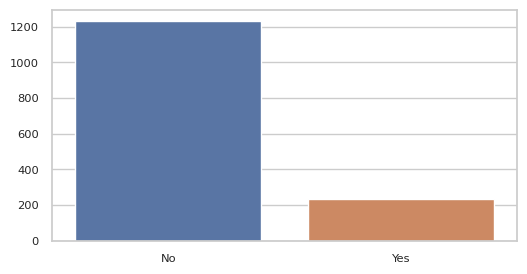

In [20]:
attrition_counts = df['Attrition'].value_counts()

sns.set_style("whitegrid")

# Plot the count of each group
sns.barplot(x=attrition_counts.index, y=attrition_counts.values)
plt.gcf().set_size_inches(6, 3)


Due to the imbalanced nature of the Attrition data, I intend to address this issue by employing the Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic samples for the minority class. Subsequently, I will utilize classification models designed to handle imbalanced data, such as Random Forest, AdaBoost, or Gradient Boosting. To assess the model's performance, I will prioritize evaluation metrics like precision, recall, F1-score, and the area under the ROC curve (AUC-ROC) instead of relying on accuracy, which can be misleading when dealing with imbalanced datasets

In [21]:
#Split Feature and Target

y = df['Attrition']
X = df.drop(columns='Attrition')

Before using SMOTE we have to encoding the "text" features

In [22]:
non_rank_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

rank_features = ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
                  'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
                 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


transformer = ColumnTransformer(
    transformers = [
        ("OneHot", OneHotEncoder(drop='first'),non_rank_features),
        ("Ordinal",OrdinalEncoder(),rank_features)
    ],
    remainder = "passthrough"
)

#Get the column name for all feature (including the encoded columns)
X_transformed = transformer.fit_transform(X)
onehot_features = transformer.named_transformers_['OneHot'].get_feature_names_out(non_rank_features)
all_features = onehot_features.tolist() + rank_features

X_encoded = pd.DataFrame(
          X_transformed,
          columns = all_features

 )

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [23]:
#Using SMOTE to deal imbalanced data
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_encoded, y_encoded)

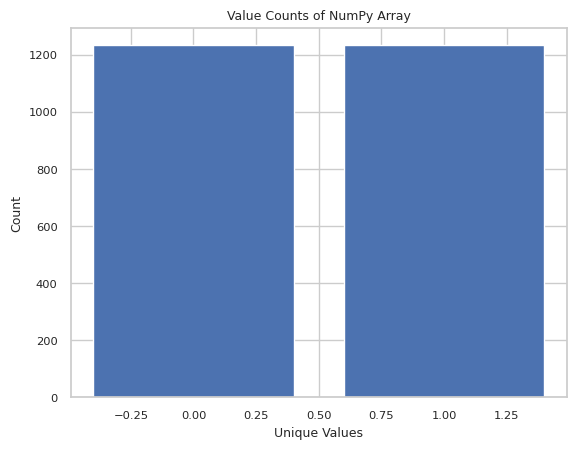

In [24]:
unique_values, counts = np.unique(y_smote, return_counts=True)
plt.bar(unique_values, counts)
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.title("Value Counts of NumPy Array")
plt.show()

In [25]:
# split dataset to test and training set (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.25, random_state=1)

### 3.3 Functions for Evaluation and tunning parameter

In [26]:

methodDict = {} # This would be used for plotting the model's performance

results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score','AOC'])


def EvaluateModel(model, y_test, y_pred, plot=False):
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Visualize Confusion Matrix
    sns.heatmap(confusion, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Metrics computed from a confusion matrix
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - accuracy)

    # Classification Report
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Plot ROC Curve
    if plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    print('AUC:', auc)

    results_df.loc[len(results_df)] = [model.__class__.__name__, accuracy, precision, recall, f1,auc]


    methodDict[model.__class__.__name__] = metrics.accuracy_score(y_test, y_pred) * 100


In [27]:
# Because dataset is small, I still would like to use Random Search instead of Bayes, or gridsearch because I want to minimize the tuning time and better result,. In this case : I use RandomizedSearchCV
# Reference to https://towardsdatascience.com/gridsearch-vs-randomizedsearch-vs-bayesiansearch-cfa76de27c6b


from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 2)

from sklearn.model_selection import RandomizedSearchCV

def RandomSearch(base_model, param_dist):
    reg_random = RandomizedSearchCV(estimator=base_model,
                    param_distributions=param_dist,
                    n_iter=10,
                    cv=kf,
                    n_jobs=8,
                    scoring='accuracy',
                    random_state=2)

    # Fit the model with training data
    reg_random.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = reg_random.predict(X_test)

    # Print the best score and best parameters from the RandomizedSearchCV
    print('RandomSearch. Best Score: ', reg_random.best_score_)
    print('RandomSearch. Best Params: ', reg_random.best_estimator_.get_params())

    # Now, evaluate the model using the EvaluateModel function
    accuracy_score = EvaluateModel(reg_random.best_estimator_, y_test, y_pred, plot=True)





## 4. Evaluation Model

### 4.1 DecisionTree

########### Decision-Tree ###############
RandomSearch. Best Score:  0.8702102102102103
RandomSearch. Best Params:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 19, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


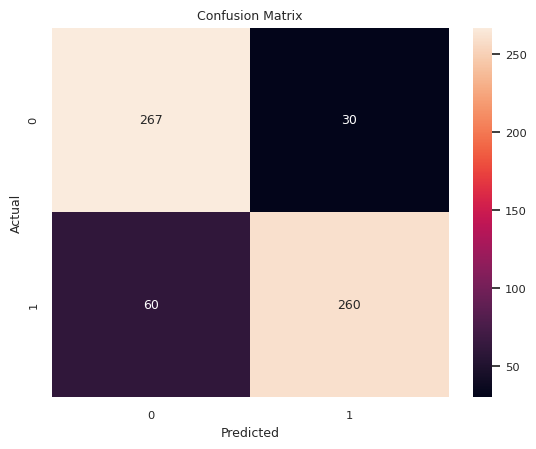

Classification Accuracy: 0.8541329011345219
Classification Error: 0.1458670988654781
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       297
           1       0.90      0.81      0.85       320

    accuracy                           0.85       617
   macro avg       0.86      0.86      0.85       617
weighted avg       0.86      0.85      0.85       617



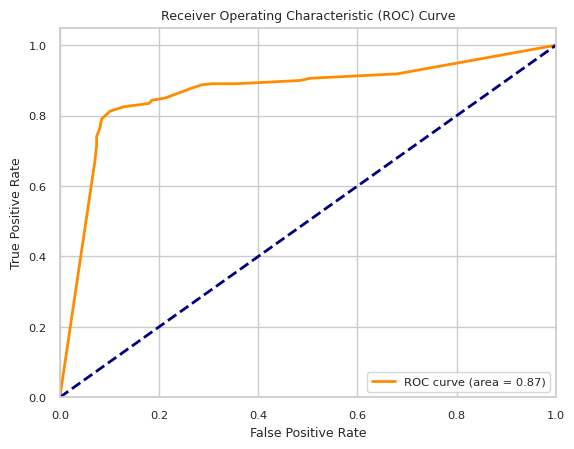

AUC: 0.8664457070707071


In [28]:
model_1 = DecisionTreeClassifier()
param_dist = {'max_depth': list(range(1, 9)),
              "max_features": list(range(1, len(X.columns))),
              "min_samples_split": list(range(2, 9)),
              "min_samples_leaf": list(range(1, 9)),
              "criterion": ["gini", "entropy"],
              }

print('########### Decision-Tree ###############')
RandomSearch(model_1, param_dist)


### 4.2 RandomForest

########### Random Forest ###############
RandomSearch. Best Score:  0.924283307697942
RandomSearch. Best Params:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 25, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 67, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


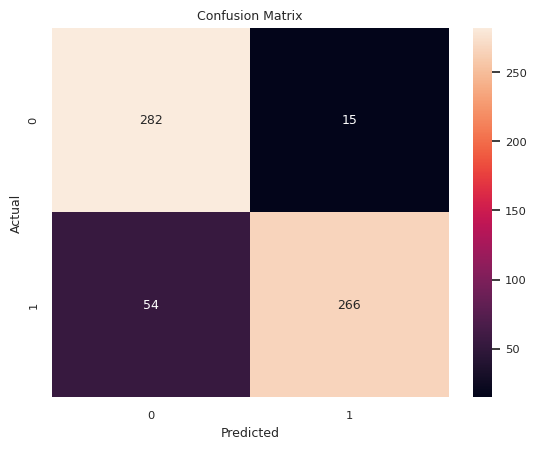

Classification Accuracy: 0.8881685575364667
Classification Error: 0.11183144246353327
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       297
           1       0.95      0.83      0.89       320

    accuracy                           0.89       617
   macro avg       0.89      0.89      0.89       617
weighted avg       0.89      0.89      0.89       617



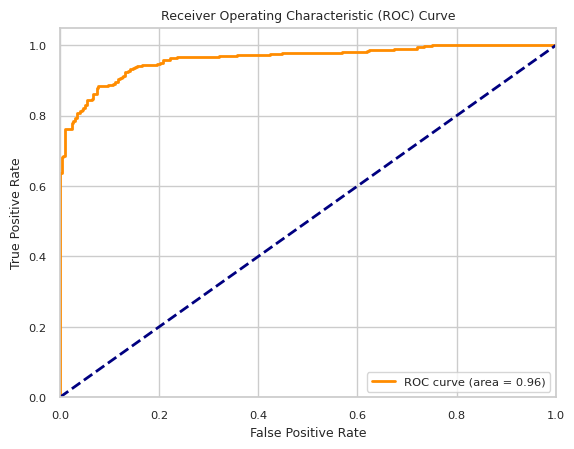

AUC: 0.9612584175084176


In [29]:
model_2 = RandomForestClassifier()
estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
param_dist = {'n_estimators' : estimators,
             'max_depth': list(range(1, 9)),
              "max_features": list(range(1, len(X.columns))),
              "min_samples_split": list(range(3, 9)),
              "min_samples_leaf": list(range(1, 9)),
              "criterion": ["gini", "entropy"]}


print('########### Random Forest ###############')

RandomSearch(model_2, param_dist)

### 4.3 Adaboost - RandomForest Base

########### AdaBoosting ###############


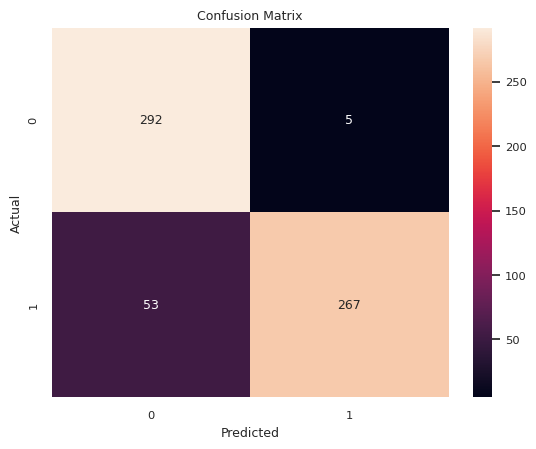

Classification Accuracy: 0.9059967585089141
Classification Error: 0.09400324149108585
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       297
           1       0.98      0.83      0.90       320

    accuracy                           0.91       617
   macro avg       0.91      0.91      0.91       617
weighted avg       0.92      0.91      0.91       617



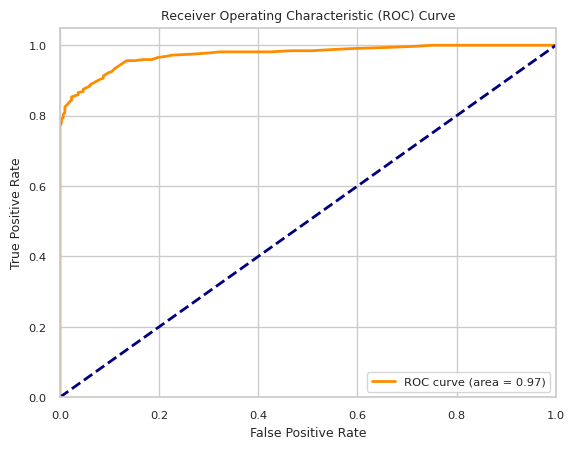

AUC: 0.9739215067340067


In [30]:
forest = RandomForestClassifier()
model = AdaBoostClassifier(base_estimator= forest, n_estimators= 100,random_state = 2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('########### AdaBoosting ###############')

EvaluateModel(model, y_test, y_pred, True)

### 4.4 Gradient Boosting

########### GradientBoosting ###############


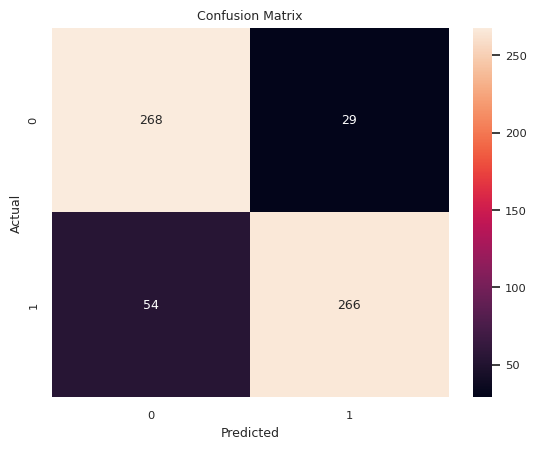

Classification Accuracy: 0.8654781199351702
Classification Error: 0.1345218800648298
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       297
           1       0.90      0.83      0.87       320

    accuracy                           0.87       617
   macro avg       0.87      0.87      0.87       617
weighted avg       0.87      0.87      0.87       617



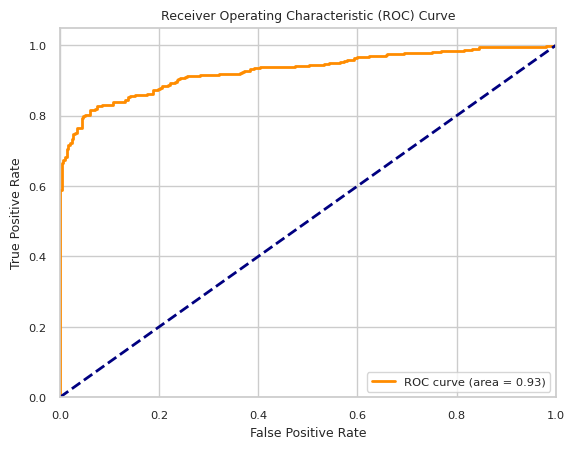

AUC: 0.9274831649831651


In [31]:
model = GradientBoostingClassifier(n_estimators =100, max_depth =1,random_state = 2 )
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('########### GradientBoosting ###############')

EvaluateModel(model, y_test, y_pred, True)

## 5 Model Result Comperation & Conclusion

In [32]:
# Display the results in a table
print(results_df)


                        Model  Accuracy  Precision    Recall  F1-Score  \
0      DecisionTreeClassifier  0.854133   0.896552  0.812500  0.852459   
1      RandomForestClassifier  0.888169   0.946619  0.831250  0.885191   
2          AdaBoostClassifier  0.905997   0.981618  0.834375  0.902027   
3  GradientBoostingClassifier  0.865478   0.901695  0.831250  0.865041   

        AOC  
0  0.866446  
1  0.961258  
2  0.973922  
3  0.927483  


Based on these observations, the AdaBoost model appears to be the best choice for predicting employee's attrition. It achieves a high accuracy, precision, recall, F1-score and AOC score indicating its effectiveness in identifying employees who are likely to leave the company while minimizing false positives